<a href="https://colab.research.google.com/github/ranitha84/tensorflow-practice/blob/main/tensorflow_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
keras.__version__

'2.4.0'

In [ ]:
(X_train_full, y_train_full),(X_test, y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0

In [ ]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
set(y_train_full)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
weights,biases = model.layers[1].weights

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.SGD(lr=0.01),
             metrics=keras.metrics.sparse_categorical_accuracy)


In [ ]:
history = model.fit(X_train,y_train,epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9951 - sparse_categorical_accuracy: 0.6826 - val_loss: 0.4979 - val_sparse_categorical_accuracy: 0.8422
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5043 - sparse_categorical_accuracy: 0.8251 - val_loss: 0.4449 - val_sparse_categorical_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4518 - sparse_categorical_accuracy: 0.8417 - val_loss: 0.4085 - val_sparse_categorical_accuracy: 0.8602
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4222 - sparse_categorical_accuracy: 0.8536 - val_loss: 0.3966 - val_sparse_categorical_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4026 - sparse_categorical_accuracy: 0.8602 - val_loss: 0.3905 - val_sparse_categorical_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3798 - spars

In [ ]:
history.history

{'loss': [0.7192497849464417,
  0.4901753067970276,
  0.4457535743713379,
  0.41693761944770813,
  0.3970656394958496,
  0.38033923506736755,
  0.36691412329673767,
  0.35481366515159607,
  0.34493300318717957,
  0.33533093333244324,
  0.32566115260124207,
  0.31795734167099,
  0.31086164712905884,
  0.30327895283699036,
  0.2972637116909027,
  0.28970491886138916,
  0.2845272719860077,
  0.279244601726532,
  0.2736610472202301,
  0.2684832513332367,
  0.2646109461784363,
  0.25847625732421875,
  0.25470659136772156,
  0.25016289949417114,
  0.24522186815738678,
  0.24084194004535675,
  0.2374342530965805,
  0.23267214000225067,
  0.22986239194869995,
  0.22518664598464966],
 'sparse_categorical_accuracy': [0.7628363370895386,
  0.8290727138519287,
  0.8442727327346802,
  0.8546909093856812,
  0.8618909120559692,
  0.8667454719543457,
  0.8710908889770508,
  0.8738727569580078,
  0.8783090710639954,
  0.8813818097114563,
  0.8853272795677185,
  0.8857636451721191,
  0.8885272741317749,

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

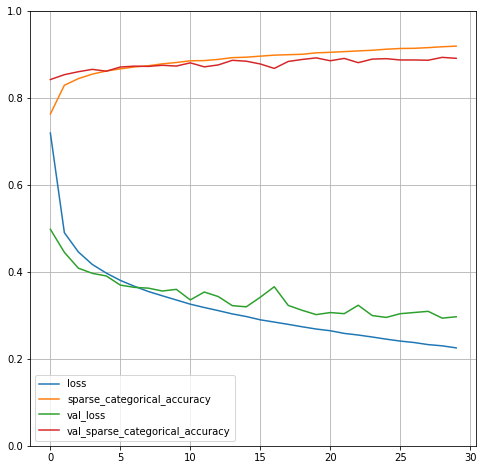

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,8))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 64.3683 - sparse_categorical_accuracy: 0.8507


[64.36831665039062, 0.8507000207901001]

In [ ]:
X_new = X_test[:3]

In [ ]:
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
y_proba = model.predict(X_new)

In [ ]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
y_pred= np.argmax(model.predict(X_new), axis=-1)

In [ ]:
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]

In [ ]:
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

### Split train data again into train and validation dataset

In [ ]:
X_train,X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test= scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation='relu', input_shape= X_train.shape[1:]),
                                 keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= keras.losses.mean_squared_error, optimizer=keras.optimizers.SGD(learning_rate=0.01
                                                                                    ))

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid), epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3251 - val_loss: 2.2509
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6786 - val_loss: 0.6573
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5860 - val_loss: 0.4229
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4303 - val_loss: 0.3910
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3764 - val_loss: 0.3759
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3833 - val_loss: 0.3694
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3718 - val_loss: 0.3629
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3587 - val_loss: 0.3648
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3506 - val_loss: 0.3587
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3693 - val_loss: 0.3580

In [ ]:
mse_test= model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 869us/step - loss: 0.3525


In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred= model.predict(X_new)

In [ ]:
y_pred

array([[1.3695921],
       [2.0992439],
       [3.010931 ]], dtype=float32)

In [ ]:
y_new= y_test[:3]
y_new

array([0.989, 1.14 , 2.653])